<a href="https://colab.research.google.com/github/AbrarKarim01/COMP-5011-ML_NN/blob/main/Week_4_Lec_6(GD_Regressor_class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score # disable it while calculating b by keeping slope fixed


In [ ]:
#X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13) # disable it while calculating b by keeping slope fixed

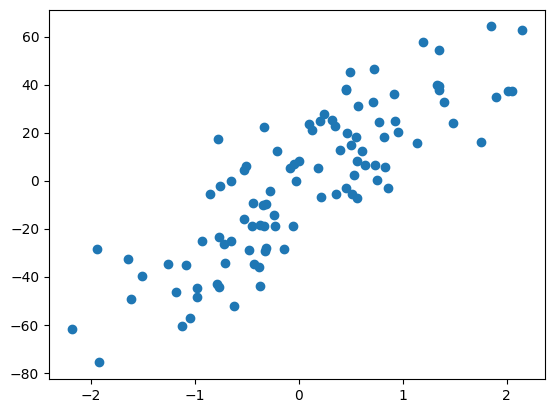

In [ ]:
plt.scatter(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [ ]:
np.mean(cross_val_score(reg,X,y,scoring='r2',cv=10))                    # disable it while calculating b by keeping slope fixed ### Performing cross validation

0.6375011587464419

In [ ]:
###m = 27.82                                                               # enable it while calculating b by keeping slope fixed

In [ ]:
class GDRegressor:

  def __init__(self, learning_rate, epochs):
    self.m = 100                                                                # use 100 when execute this program for calculating slope, for b we used 27.82
    self.b = -120
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    #calculate the b using GD
    for i in range(self.epochs):
      loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)                       #Loss slope w.r.t 'b'
      loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())           # disable it while calculating 'b' by keeping slope fixed
      self.b = self.b - (self.lr * loss_slope_b)
      self.m = self.m - (self.lr * loss_slope_m)                                      # disable it while calculating 'b' by keeping slope fixed
      #print (loss_slope_b, self.b)                                  # Once get very huge value for intercept, I wanted to see whats happening in each epoch.
    print (self.m, self.b)                                                          # disable it while calculating 'b' by keeping slope fixed
    #print(self.b)

In [ ]:
gd = GDRegressor(0.001, 35)

In [ ]:
gd.fit(X,y)  # This will let us know how much slope we will get after 10 epochs

27.96968783805175 -2.3794492229634963


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = m_arr, y = b_arr, z =z_arr)])

fig.update_layout(title='Cost Function', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))



fig.show()

fig.write_html("cost_function.html")

NameError: name 'm_arr' is not defined

In [ ]:
b = 150
m = -127.82
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), z=np.array(all_cost).ravel()*100)

fig.add_trace(go.Surface(x = m_arr, y = b_arr, z =z_arr*100 ))

fig.show()

fig.write_html("cost_function2.html")


NameError: name 'all_m' is not defined

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=np.array(all_m).ravel(), y=np.array(all_b).ravel(), name='High 2014',
                         line=dict(color='#fff', width=4)))

fig.add_trace(go.Contour(z=z_arr,x=m_arr,y=b_arr))
fig.show()

NameError: name 'all_m' is not defined

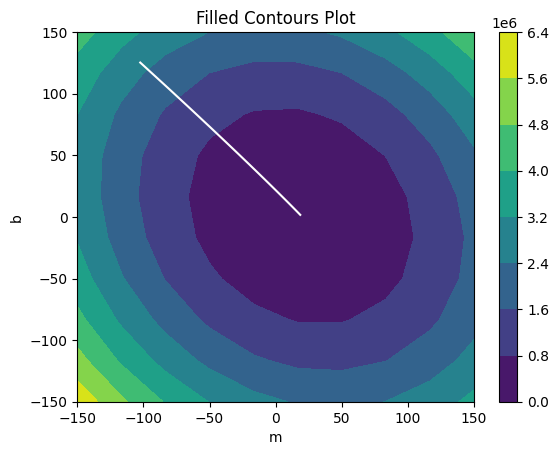

<Figure size 1800x400 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()

NameError: name 'm_arr' is not defined

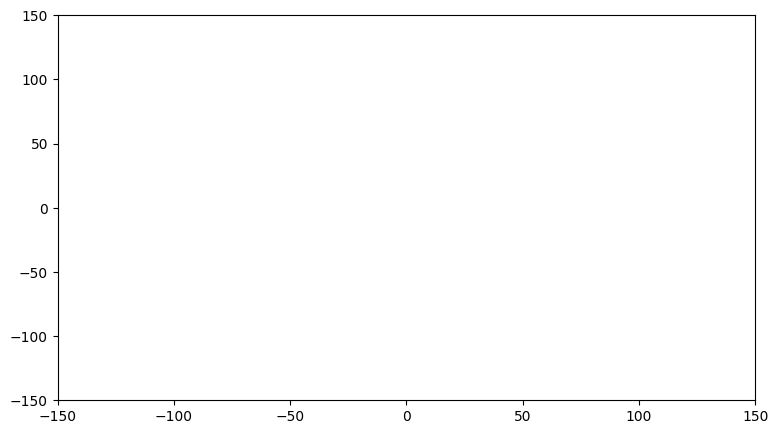

In [ ]:
#matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150))

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white')

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i])
    ydata.append(all_b[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

#f = r"animation8.gif"
#writergif = animation.PillowWriter(fps=2)
#anim.save(f, writer=writergif)